In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/nagarjuna843/Decision-Tree/main/data.csv')
df

,ID,Age,Income,Gender,Marital_Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [3]:
inputs=df.drop(['ID','Buys'],axis='columns')
target_n=df['Buys']

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [5]:
inputs['Age_n']=LabelEncoder().fit_transform(inputs['Age'])
inputs['Income_n']=LabelEncoder().fit_transform(inputs['Income'])
inputs['Gender_n']=LabelEncoder().fit_transform(inputs['Gender'])
inputs['Marital_Status_n']=LabelEncoder().fit_transform(inputs['Marital_Status'])

In [6]:
inputs_n=inputs.drop(['Age','Income','Gender','Marital_Status'],axis='columns')

In [7]:
model=tree.DecisionTreeClassifier()

In [8]:
model.fit(inputs_n,target_n)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
model.score(inputs_n,target_n)

1.0

In [10]:
model.predict([[1,1,2,2]])

array(['No'], dtype=object)

[Text(334.8, 498.3, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(251.10000000000002, 407.70000000000005, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(418.5, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(251.10000000000002, 317.1, 'X[1] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(167.4, 226.5, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(83.7, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 135.89999999999998, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(334.8, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(334.8, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(585.9, 317.1, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(502.20000000000005, 226.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(669.6, 226.

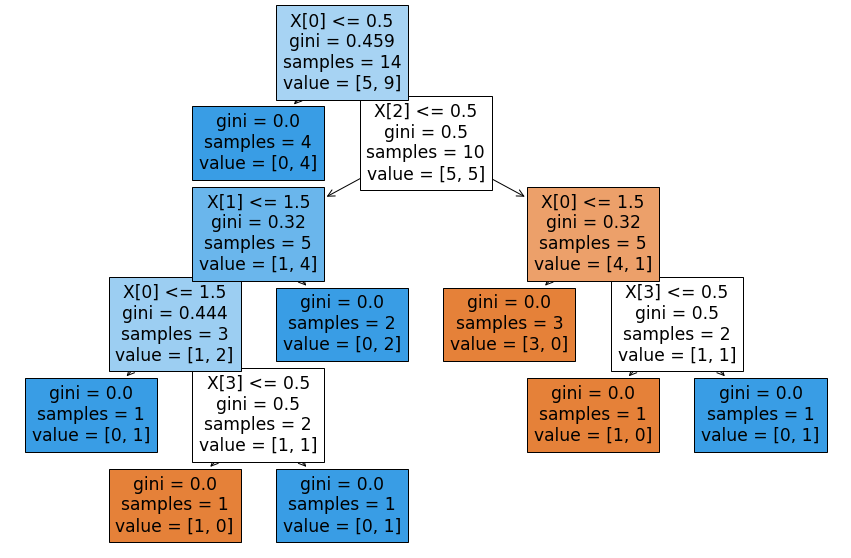

In [11]:
clf=model.fit(inputs_n,target_n)
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [12]:
feature_importance=pd.DataFrame(model.feature_importances_,inputs_n.columns,columns=['Importance'])
feature_importance.sort_values('Importance',ascending=False).round(2)

,Importance
Age_n,0.37
Marital_Status_n,0.31
Gender_n,0.28
Income_n,0.04


In [13]:
predict=model.predict(inputs_n)
output=pd.DataFrame({'Marital_Status':df.Marital_Status,'Age':df.Age,'Gender':df.Income,'Gender':df.Income,'Buys_Predicted':predict,'Buys_Actual':df.Buys})
output

,Marital_Status,Age,Gender,Buys_Predicted,Buys_Actual
0,Single,<21,High,No,No
1,Married,<21,High,No,No
2,Single,21-35,High,Yes,Yes
3,Single,>35,Medium,Yes,Yes
4,Single,>35,Low,Yes,Yes
5,Married,>35,Low,No,No
6,Married,21-35,Low,Yes,Yes
7,Single,<21,Medium,No,No
8,Married,<21,Low,Yes,Yes
9,Single,>35,Medium,Yes,Yes
